Shape del dataset: (7043, 21)

Columnas:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Tipos de datos:

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object

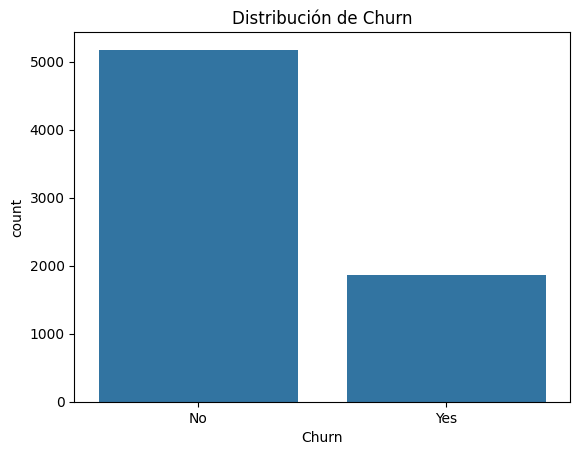

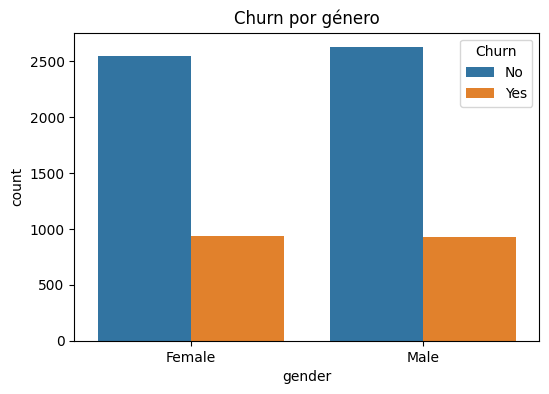

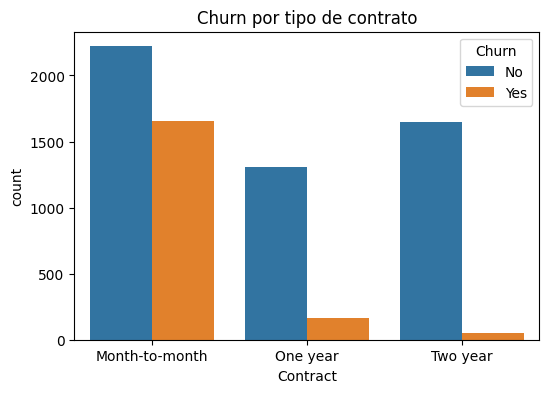

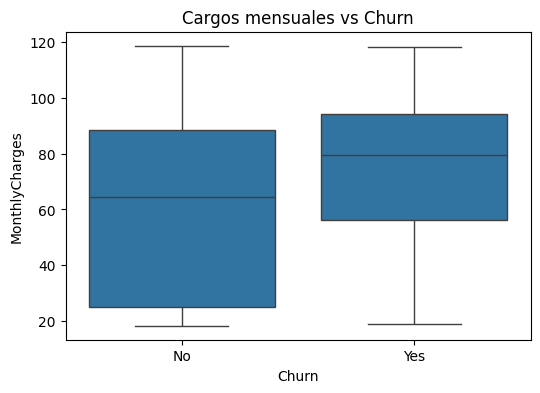


--- Regresión logística ---
              precision    recall  f1-score   support

       False       0.85      0.90      0.87      1552
        True       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113


--- Random Forest ---
              precision    recall  f1-score   support

       False       0.82      0.90      0.86      1552
        True       0.62      0.47      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113


Conclusiones:
- El churn rate en este dataset está alrededor del 26.54%.
- Los clientes con contratos mes a mes tienen mayor tasa de churn.
- Los cargos mensuales altos también están asociados a mayor churn.
- Random Forest suele dar mejor recall que la regresión logística en este dataset.


In [2]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Cargar datos
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Shape del dataset:", df.shape)
print("\nColumnas:\n", df.columns)
print("\nTipos de datos:\n")
print(df.dtypes)

# 3. Limpiar datos
# Convertir TotalCharges a numérico
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Rellenar nulos en TotalCharges con 0
df["TotalCharges"] = df["TotalCharges"].fillna(0)

# 4. Churn Rate
churn_rate = df["Churn"].value_counts(normalize=True)["Yes"] * 100
print(f"\nChurn Rate: {churn_rate:.2f}%")

sns.countplot(x="Churn", data=df)
plt.title("Distribución de Churn")
plt.show()

# 5. EDA básico
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Churn por género")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn por tipo de contrato")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Cargos mensuales vs Churn")
plt.show()

# 6. Preprocesamiento
# One-hot encoding para variables categóricas
df_enc = pd.get_dummies(df.drop("customerID", axis=1), drop_first=True)

# Features y target
X = df_enc.drop("Churn_Yes", axis=1)
y = df_enc["Churn_Yes"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables numéricas
scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 7. Modelos
# --- Regresión logística ---
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("\n--- Regresión logística ---")
print(classification_report(y_test, y_pred_log))

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))

# 8. Conclusiones rápidas
print("\nConclusiones:")
print("- El churn rate en este dataset está alrededor del {:.2f}%.".format(churn_rate))
print("- Los clientes con contratos mes a mes tienen mayor tasa de churn.")
print("- Los cargos mensuales altos también están asociados a mayor churn.")
